In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()

In [ ]:
# Crear un DataFrame con los datos
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Agregar la columna de las especies (target) al DataFrame
df['species'] = iris.target

# Mapeo de las etiquetas numéricas a nombres de especies
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# Mapeo de las etiquetas numéricas a nombres de especies
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Mostrar las primeras filas del dataset
(df.head())
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,5.0,1.9,NaN
147,6.5,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,NaN


In [ ]:
# Paso 1: Filtrar por especie
setosa = df[df['species'] == 'Setosa']
versicolor = df[df['species'] == 'Versicolor']
virginica = df[df['species'] == 'Virginica']

# Paso 2: Calcular los promedios manualmente para cada característica
def calcular_promedio_manual(datos, caracteristica):
    suma = 0
    total_flores = len(datos)
    for valor in datos[caracteristica]:
        suma += valor
    promedio = suma / total_flores
    return promedio


In [ ]:
# Paso 1: Filtrar por especie
setosa = df[df['species'] == 'Setosa']
versicolor = df[df['species'] == 'Versicolor']
virginica = df[df['species'] == 'Virginica']

# Paso 2: Calcular los promedios manualmente para cada característica

def calcular_promedio_manual(datos, caracteristica):
    suma = 0
    total_flores = len(datos)
    for valor in datos[caracteristica]:
        suma += valor
    promedio = suma / total_flores
    return promedio

# Características a promediar
caracteristicas = iris.feature_names

# Crear diccionario para guardar los resultados
promedios = {'Setosa': {}, 'Versicolor': {}, 'Virginica': {}}

# Calcular los promedios manualmente para cada especie
for especie, datos in zip(['Setosa', 'Versicolor', 'Virginica'], [setosa, versicolor, virginica]):
    for caracteristica in caracteristicas:
        promedio = calcular_promedio_manual(datos, caracteristica)
        promedios[especie][caracteristica] = promedio

# Mostrar los promedios calculados manualmente
for especie, valores in promedios.items():
    print(f"\nPromedios de {especie}:")
    for caracteristica, promedio in valores.items():
        print(f"{caracteristica}: {promedio:.2f}")



Promedios de Setosa:
sepal length (cm): 5.01
sepal width (cm): 3.43
petal length (cm): 1.46
petal width (cm): 0.25

Promedios de Versicolor:
sepal length (cm): 5.94
sepal width (cm): 2.77
petal length (cm): 4.26
petal width (cm): 1.33

Promedios de Virginica:
sepal length (cm): 6.59
sepal width (cm): 2.97
petal length (cm): 5.55
petal width (cm): 2.03


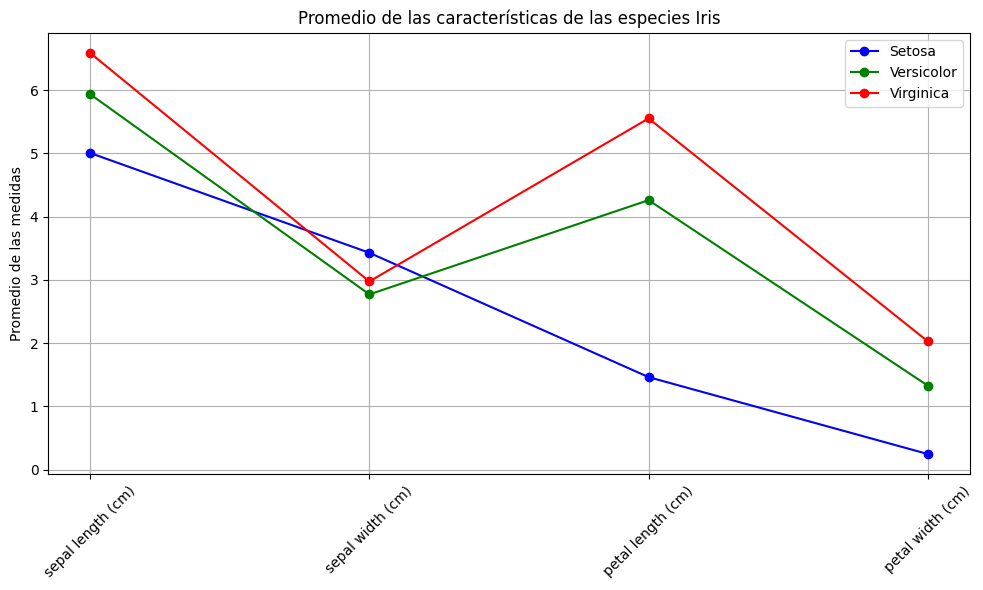

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular el promedio manualmente para cada característica
def calcular_promedio_manual(datos, caracteristica):
    suma = sum(datos[caracteristica])
    promedio = suma / len(datos)
    return promedio

# Calcular los promedios manualmente para cada especie
promedios_setosa = [calcular_promedio_manual(setosa, carac) for carac in caracteristicas]
promedios_versicolor = [calcular_promedio_manual(versicolor, carac) for carac in caracteristicas]
promedios_virginica = [calcular_promedio_manual(virginica, carac) for carac in caracteristicas]

# Crear un gráfico en el plano cartesiano
x = np.arange(len(caracteristicas))  # Índices para el eje X

# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Graficar los promedios de cada especie
plt.plot(x, promedios_setosa, marker='o', label='Setosa', color='blue')
plt.plot(x, promedios_versicolor, marker='o', label='Versicolor', color='green')
plt.plot(x, promedios_virginica, marker='o', label='Virginica', color='red')

# Etiquetas de los ejes y título
plt.xticks(x, caracteristicas, rotation=45)  # Etiquetas del eje X con los nombres de las características
plt.ylabel('Promedio de las medidas')
plt.title('Promedio de las características de las especies Iris')

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.grid(True)
plt.show()
